In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('data/credit_train.csv', sep=';', encoding='cp1251')
data_test = pd.read_csv('data/credit_test.csv', sep=';', encoding='cp1251')

In [8]:
data.describe()

/home/ad/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,client_id,age,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170746.000000,170746.000000,170745.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,36.497283,10.980749,1.323900,40138.288354,2.107308,0.046070,0.176028
std,49290.268869,10.546008,3.536698,0.235813,25044.205336,1.777128,0.211548,0.380845
min,1.000000,18.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,28.000000,10.000000,1.100000,NaN,NaN,NaN,0.000000
50%,85373.500000,34.000000,10.000000,1.320000,NaN,NaN,NaN,0.000000
75%,128059.750000,43.000000,12.000000,1.600000,NaN,NaN,NaN,0.000000
max,170746.000000,71.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


# preprocessing

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
client_id               170746 non-null int64
gender                  170746 non-null object
age                     170746 non-null int64
marital_status          170746 non-null object
job_position            170746 non-null object
credit_sum              170746 non-null float64
credit_month            170746 non-null int64
tariff_id               170746 non-null float64
score_shk               170746 non-null float64
education               170746 non-null object
living_region           170746 non-null object
monthly_income          170746 non-null float64
credit_count            170746 non-null float64
overdue_credit_count    170746 non-null float64
open_account_flg        170746 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 19.5+ MB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91940 entries, 0 to 91939
Data columns (total 14 columns):
client_id               91940 non-null int64
gender                  91940 non-null object
age                     91940 non-null int64
marital_status          91940 non-null object
job_position            91940 non-null object
credit_sum              91940 non-null float64
credit_month            91940 non-null int64
tariff_id               91940 non-null float64
score_shk               91940 non-null float64
education               91940 non-null object
living_region           91940 non-null object
monthly_income          91940 non-null int64
credit_count            91940 non-null float64
overdue_credit_count    91940 non-null float64
dtypes: float64(5), int64(4), object(5)
memory usage: 9.8+ MB


* gender --- 0/1
* age --- int
* marital-status --- one-hot
* job_position --- one-hot
* credit_month --- one-hot
* tariff_id --- one-hot
* education --- one-hot or ord?
* living-region --- one-hot

In [8]:
data.head(10)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,59998.00,10,1.6,0.770249,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,2,F,28,MAR,UMN,10889.00,6,1.1,0.248514,GRD,МОСКВА,43000.0,2.0,0.0,0
2,3,M,32,MAR,SPC,10728.00,12,1.1,0.459589,SCH,САРАТОВСКАЯ,23000.0,5.0,0.0,0
3,4,F,27,DIV,SPC,12009.09,12,1.1,0.362536,GRD,ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
4,5,M,45,MAR,SPC,16908.89,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,25000.0,1.0,0.0,0
5,6,F,37,MAR,SPC,26788.00,10,1.1,0.484203,SCH,СТАВРОПОЛЬСКИЙ,30000.0,0.0,0.0,0
6,7,M,34,MAR,SPC,10317.00,6,1.5,0.276012,SCH,НИЖЕГОРОДСКАЯ,28000.0,3.0,0.0,0
7,8,F,26,UNM,SPC,47878.00,10,1.1,0.512525,GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
8,9,M,23,UNM,SPC,37577.16,12,1.6,0.642267,SCH,ХАНТЫ-МАНСИЙСКИЙЮГРА,50000.0,3.0,0.0,0
9,10,F,32,UNM,SPC,26268.00,10,1.1,0.465026,GRD,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0


In [5]:
data.monthly_income.fillna(data.monthly_income.median(), inplace=True)
data.living_region.fillna('Н', inplace=True)
data.credit_count.fillna(0, inplace=True)
data.overdue_credit_count.fillna(0, inplace=True)

data['credit_sum'] = data.credit_sum.apply(lambda x: float(x.replace(',', '.')))
data['score_shk'] = data.score_shk.apply(lambda x: float(x.replace(',', '.')))

a = ['РЕСП', 'ОБЛ', 'ОБЛАСТЬ', 'КРАЙ', 'ОБЛ.', 'РЕСП.', 'Р-Н', 'АО', 'КРАЙ.', '-', 'Г', 'Г.', 'АОБЛ', 'РЕСПУБЛИКА',
    'ОКРУГ', 'АВТОНОМНЫЙ']
data['living_region'] = data.living_region.apply(lambda x: ''.join([y for y in x.split() if y not in a]))

In [6]:
data_test.monthly_income.fillna(data.monthly_income.median(), inplace=True)
data_test.living_region.fillna('Н', inplace=True)
data_test.credit_count.fillna(0, inplace=True)
data_test.overdue_credit_count.fillna(0, inplace=True)

data_test['credit_sum'] = data_test.credit_sum.apply(lambda x: float(x.replace(',', '.')))
data_test['score_shk'] = data_test.score_shk.apply(lambda x: float(x.replace(',', '.')))

a = ['РЕСП', 'ОБЛ', 'ОБЛАСТЬ', 'КРАЙ', 'ОБЛ.', 'РЕСП.', 'Р-Н', 'АО', 'КРАЙ.', '-', 'Г', 'Г.', 'АОБЛ', 'РЕСПУБЛИКА',
    'ОКРУГ', 'АВТОНОМНЫЙ']
data_test['living_region'] = data_test.living_region.apply(lambda x: ''.join([y for y in x.split() if y not in a]))

In [7]:
c = data_test.living_region.unique()
d = data.living_region.unique()
for elem in c:
    if elem not in d:
        data_test.loc[data_test.living_region == elem, 'living_region'] = 'Н'

Пол

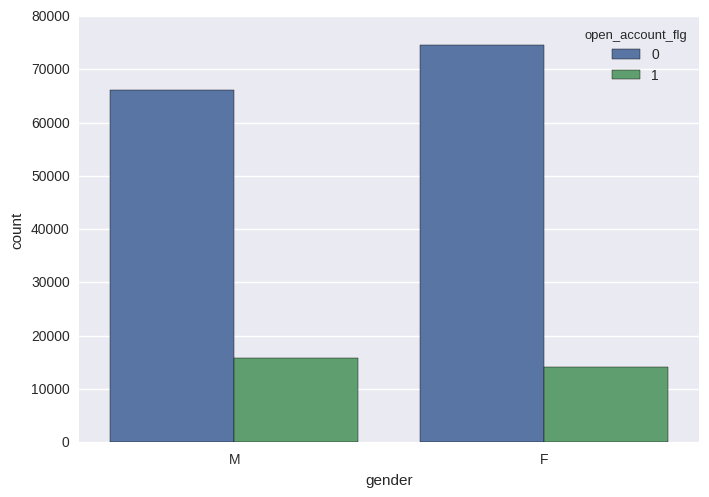

In [32]:
sns.countplot(x=data.gender, hue=data.open_account_flg)

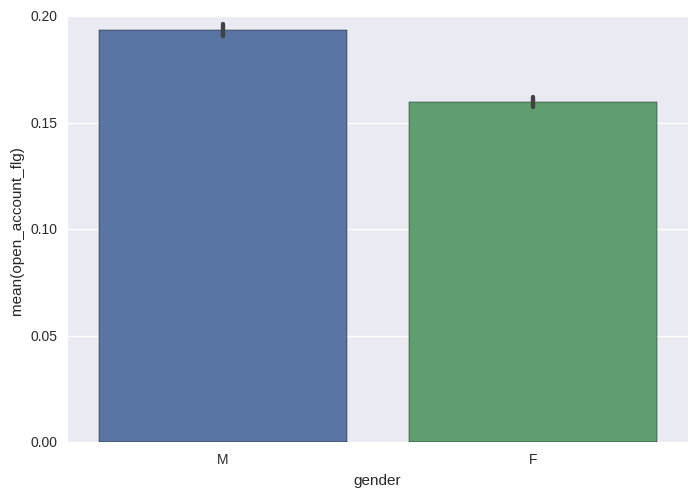

In [41]:
sns.barplot(x=data.gender, y=data.open_account_flg)

Возраст

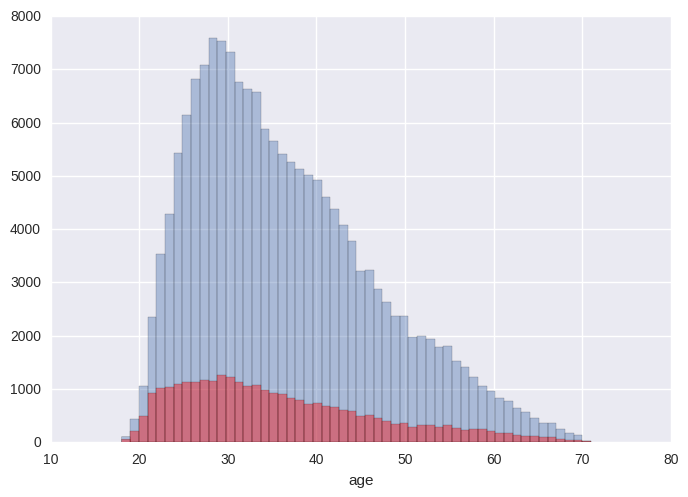

In [25]:
sns.distplot(data.age, kde=False, bins=54)
sns.distplot(data[data.open_account_flg == 1].age, kde=False, bins=54, color='r')

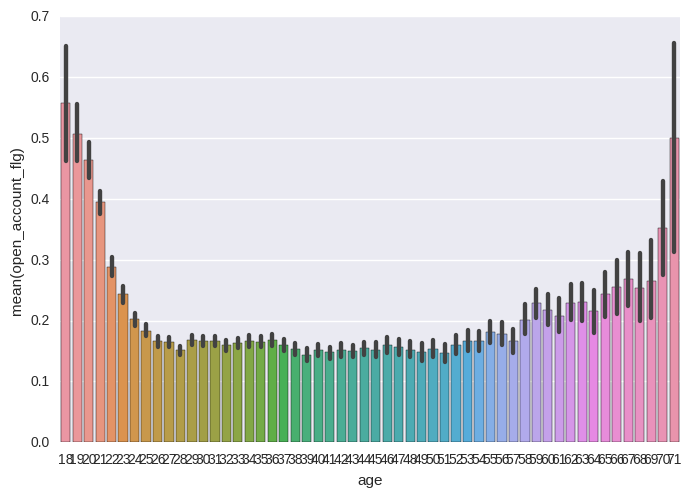

In [40]:
sns.barplot(x=data.age, y=data.open_account_flg)

Семейное положение

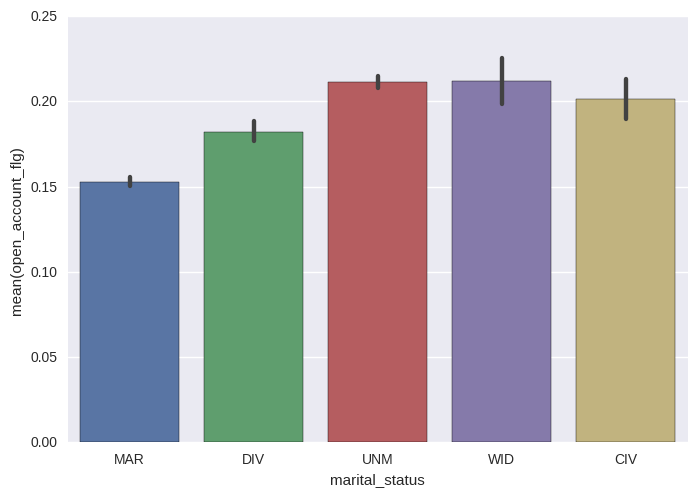

In [39]:
sns.barplot(x=data.marital_status, y=data.open_account_flg)

Образование

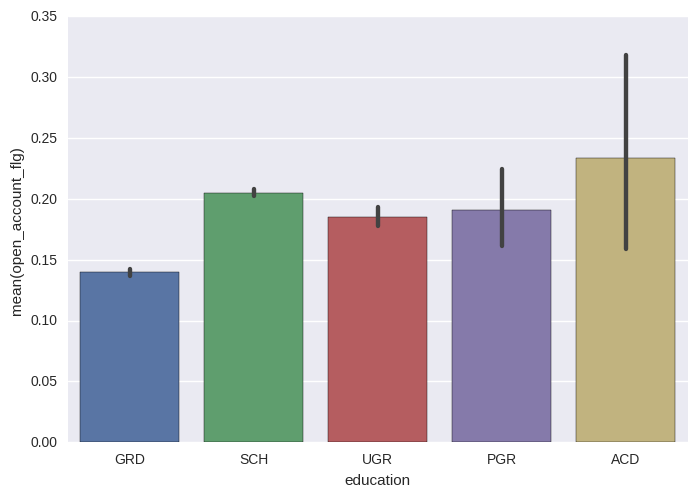

In [37]:
sns.barplot(x=data.education, y=data.open_account_flg)

Размер кредита

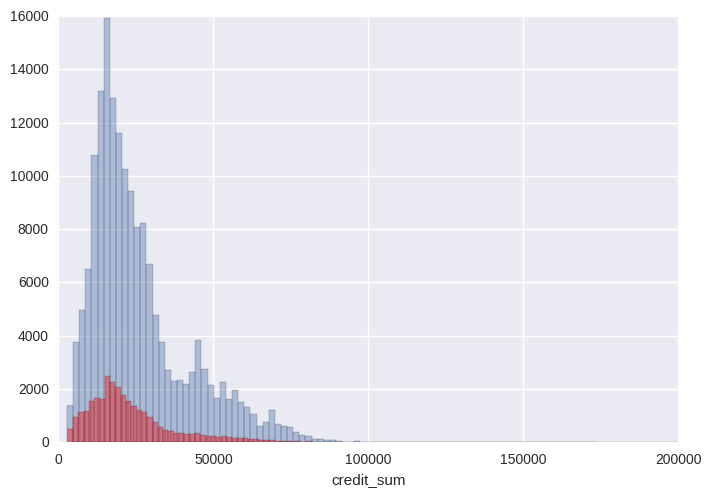

In [57]:
sns.distplot(data.credit_sum, kde=False, bins=100)
sns.distplot(data[data.open_account_flg == 1].credit_sum, kde=False, bins=100, color='r')

Тариф

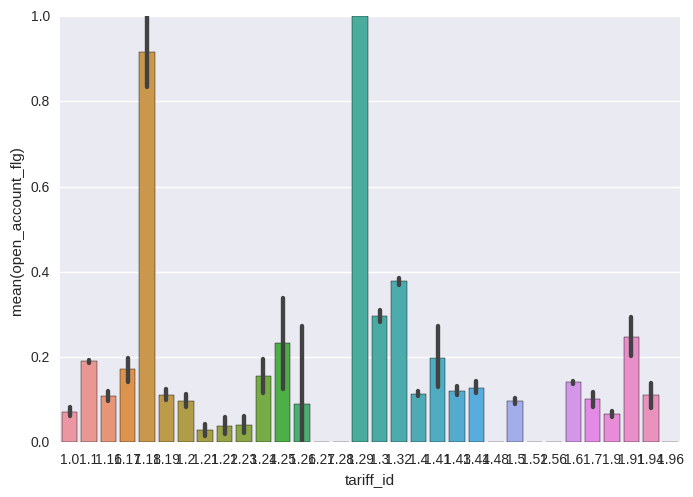

In [72]:
sns.barplot(x=data.tariff_id, y=data.open_account_flg)

Количество взятых/просроченных кредитов

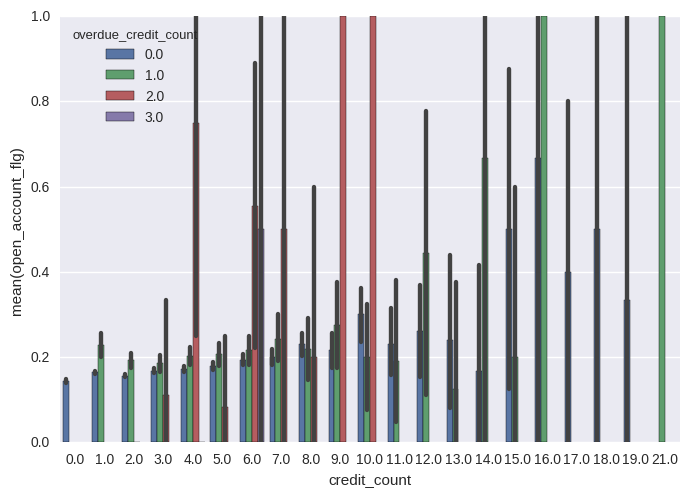

In [73]:
sns.barplot(x=data.credit_count, y=data.open_account_flg, hue=data.overdue_credit_count)

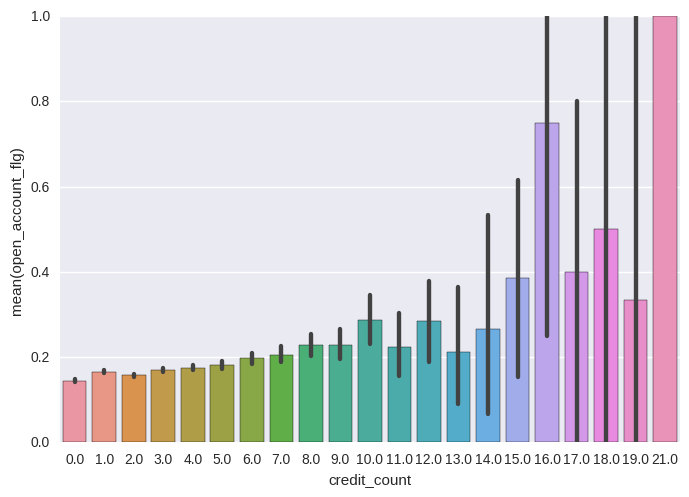

In [78]:
sns.barplot(x=data.credit_count, y=data.open_account_flg)

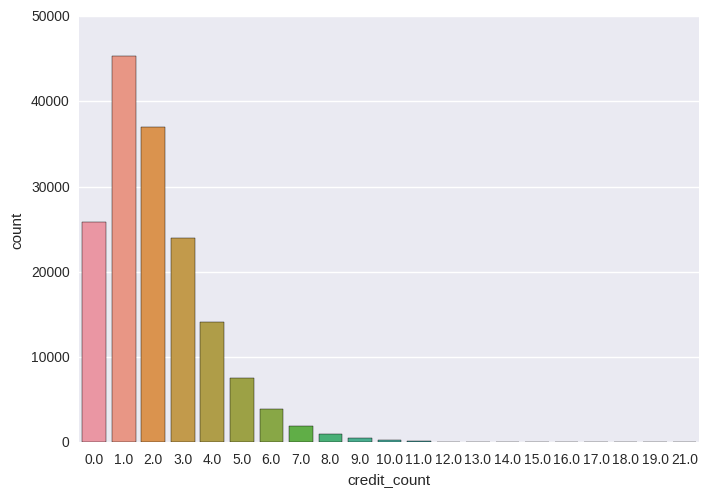

In [80]:
sns.countplot(x=data.credit_count)

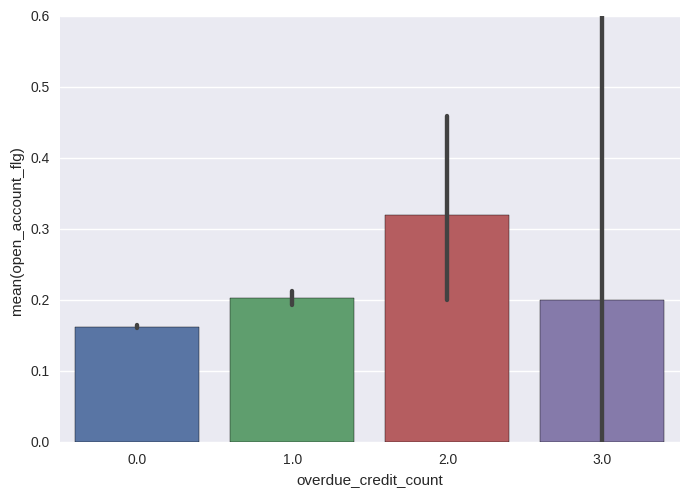

In [81]:
sns.barplot(x=data.overdue_credit_count, y=data.open_account_flg)

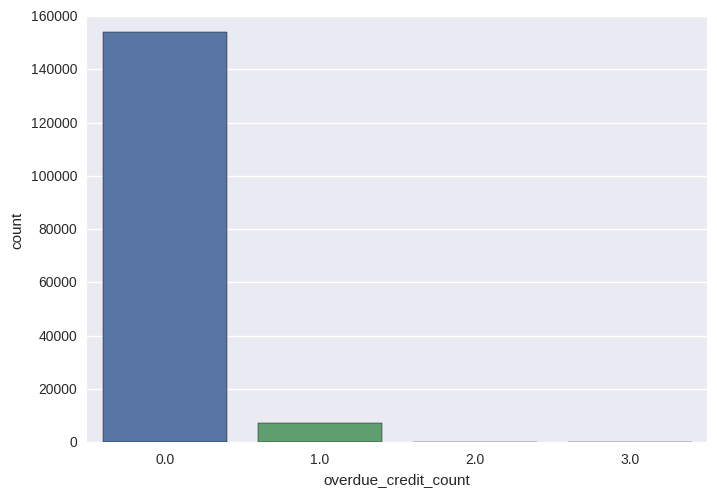

In [82]:
sns.countplot(x=data.overdue_credit_count)

score-shk???

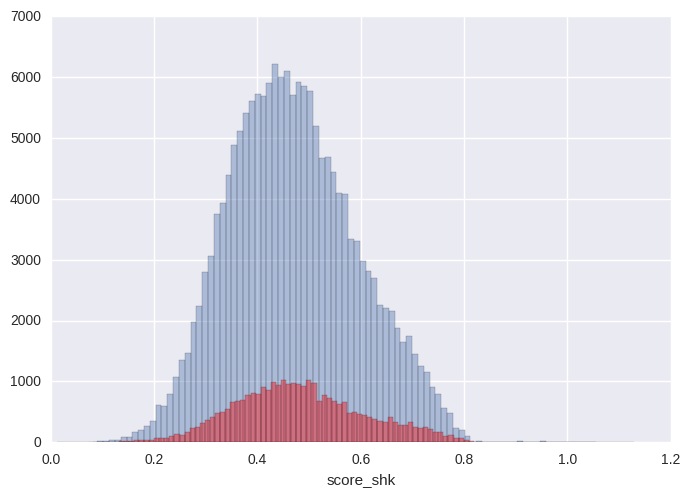

In [83]:
sns.distplot(data.score_shk, kde=False, bins=100)
sns.distplot(data[data.open_account_flg == 1].score_shk, kde=False, bins=100, color='r')

credit_month

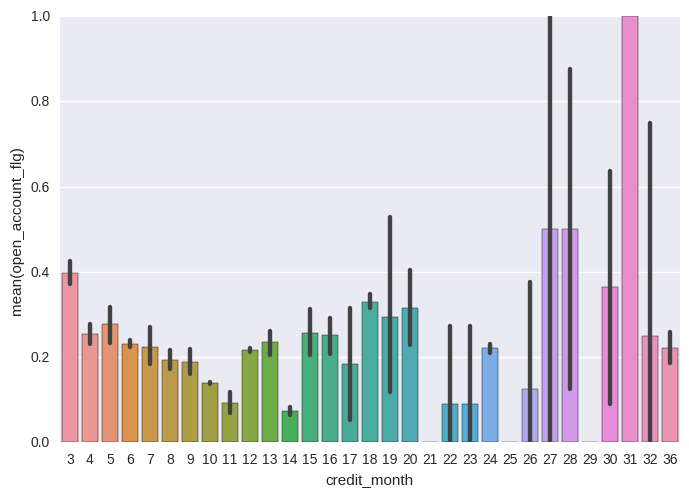

In [15]:
sns.barplot(x=data.credit_month, y=data.open_account_flg)

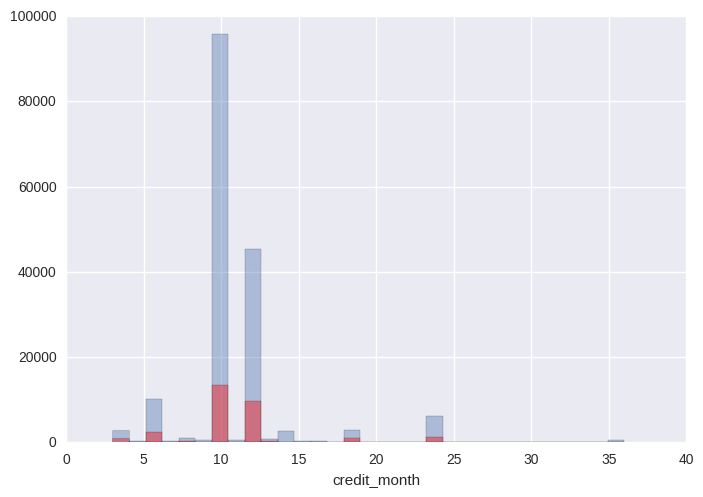

In [19]:
sns.distplot(data.credit_month, kde=False, bins=31)
sns.distplot(data[data.open_account_flg == 1].credit_month, kde=False, bins=31, color='r')

location

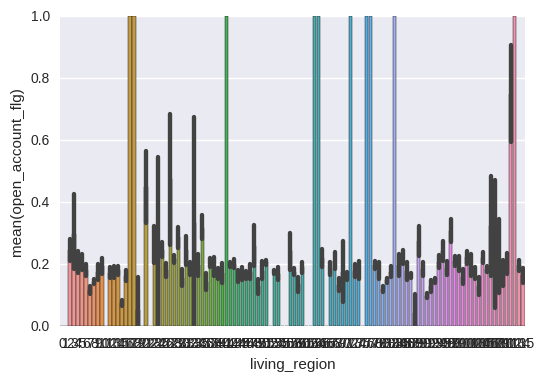

In [19]:
sns.barplot(x=data.living_region, y=data.open_account_flg)

# m

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.linear_model import SGDClassifier

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
categorical_cols = ['gender', 'marital_status', 'job_position', 'credit_month', 'tariff_id', 'education']#, 'living_region']
other_cols = ['age', 'credit_sum', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count']
all_cols = ['gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'monthly_income', 'credit_count',
       'overdue_credit_count']#living_region

label_enc = LabelEncoder()
enc = OneHotEncoder(categorical_features=[2, 3, 5, 6, 8])

for col in categorical_cols:
    label_enc.fit(data[col])
    data[col] = label_enc.transform(data[col])
    data_test[col] = label_enc.transform(data_test[col])
enc.fit(data[all_cols])
X_train = enc.transform(data[all_cols])
X_test = enc.transform(data_test[all_cols])

In [11]:
X_train.shape, X_test.shape

((170746, 98), (91940, 98))

In [12]:
clf = GradientBoostingClassifier(n_estimators=100, max_depth=7, min_samples_leaf=10, max_features=0.5)
clf.fit(X_train, data.open_account_flg)
y_test = clf.predict(X_test)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [13]:
y_test = clf.predict(X_test.toarray())

In [15]:
y_test.shape

(91940,)

In [24]:
enc.feature_indices_

array([  0,   5,  23,  54,  86,  91, 207])

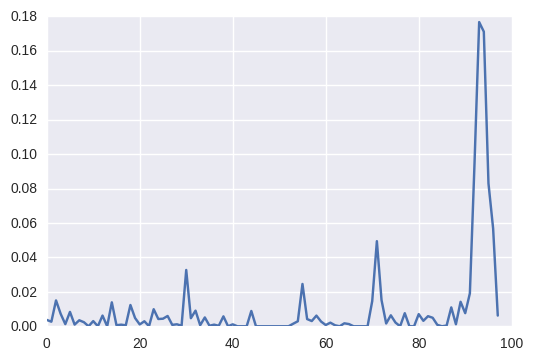

In [16]:
plt.plot(clf.feature_importances_)

In [17]:
y_train = clf.predict(X_train.toarray())

In [49]:
np.mean(y_train == data.open_account_flg)

0.8241657198411676

In [50]:
np.mean(y_train)

0.00024012275543790191

In [51]:
np.mean(data.open_account_flg)

0.17602754969369708

In [27]:
from sklearn.preprocessing import MaxAbsScaler

In [28]:
?MaxAbsScaler

In [29]:
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
clf = SGDClassifier(penalty='l1', n_iter=20, alpha=0.00001)
clf.fit(X_train, data.open_account_flg)
y_test = clf.predict(X_test)

In [48]:
y_train = clf.predict(X_train)

In [30]:
?SGDClassifier